# Sympy

## What is Symbolic Computation? 

Symbolic computation deals with the computation of mathematical objects
symbolically.  This means that the mathematical objects are represented
exactly, not approximately, and mathematical expressions with unevaluated
variables are left in symbolic form.

Let’s take an example. Say we wanted to use the built-in Python functions to
compute square roots. We might do something like this

In [1]:
import math
math.sqrt(9)

3.0

9 is a perfect square, so we got the exact answer, 3. But suppose we computed
the square root of a number that isn’t a perfect square

In [2]:
math.sqrt(8)

2.8284271247461903

Here we got an approximate result. 2.82842712475 is not the exact square root
of 8 (indeed, the actual square root of 8 cannot be represented by a finite
decimal, since it is an irrational number).  If all we cared about was the
decimal form of the square root of 8, we would be done.

But suppose we want to go further. Recall that $\sqrt{8} = \sqrt{4\cdot 2} =
2\sqrt{2}$.  We would have a hard time deducing this from the above result.
This is where symbolic computation comes in.  With a symbolic computation
system like SymPy, square roots of numbers that are not perfect squares are
left unevaluated by default

In [1]:
import sympy
sympy.sqrt(8)

2*sqrt(2)

## Why Sympy


1. It is free and open source, you can even use it as part of something you sell
2. SymPy is written entirely in Python, and is executed entirely in Python. Thus it is interoperable
3. It is very lightweight to download and install. Other packages might be Gb in size. 
4. It can be used as a library. There is an Application Programming Interface or API for use with other tools.


## A more interesting example

The above example starts to show how we can manipulate irrational numbers
exactly using SymPy.  But it is much more powerful than that.  Symbolic
computation systems (which by the way, are also often called computer algebra
systems, or just CASs) such as SymPy are capable of computing symbolic
expressions with variables.

Let us define a symbolic expression, representing the mathematical expression

In [2]:
from sympy import symbols
x, y = symbols('x y')
expr = x + 2*y
expr

x + 2*y

Note that we wrote `x + 2*y` just as we would if `x` and `y` were
ordinary Python variables. But in this case, instead of evaluating to
something, the expression remains as just `x + 2*y`.  Now let us play around
with it:

In [3]:
expr + 1

x + 2*y + 1

In [4]:
expr - x

2*y

In [5]:
x*expr

x*(x + 2*y)

Notice something in the above example.  When we typed `expr`, we did not
get $x + 2 y-x$, but rather just $2y$.  The `x` and the `-x`
automatically canceled one another.  This is similar to how `sqrt(8)`
automatically turned into `2*sqrt(2)` above.  This isn’t always the case in
SymPy, however:

In [6]:
from sympy import expand, factor
expanded = expand(x*expr)
expanded

x**2 + 2*x*y

In [7]:
factor(expanded)

x*(x + 2*y)

## The Power of Symbolic Computation

* The real power of a symbolic computation system such as SymPy is the ability to do all sorts of computations symbolically.  SymPy can simplify expressions,
    * compute derivatives
    * integrals
    * limits
    * solve equations
    * work with matrices
 

It includes modules for plotting, printing (like 2D pretty printed output of math
formulas, or $\mathrm{\LaTeX}$, code generation, physics, statistics, combinatorics,
number theory, geometry, logic, and more. Here is a small sampling of the sort
of symbolic power SymPy is capable of, to whet your appetite.

In [8]:
# * means we import everything from the package
from sympy import *

# defines multiple symbols at once
x, t, z, nu = symbols('x t z nu')

In [9]:
# x is now an object of type Symbol 
type(x)

sympy.core.symbol.Symbol

In [10]:
#This will make things look pretty
init_printing(use_unicode=True)

### Class Excercise

1. *Take* the derivative of $sin{(x)}e^x$
2. Compute $\int(e^x\sin{(x)} + e^x\cos{(x)})\,dx$
3. Compute $\int_{-\infty}^\infty \sin{(x^2)}\,dx$
4. Find $\lim_{x\to 0}\frac{\sin{(x)}}{x}$
5. Solve $x^2 - 2 = 0$
6. Solve the differential equation $y'' - y = e^t$

1. *Take* the derivative of $sin{(x)}e^x$

In [17]:
# Type Your Solution Here

In [18]:
diff(sin(x)*exp(x), x)

2. Compute $\int(e^x\sin{(x)} + e^x\cos{(x)})\,dx$

In [19]:
# Type Your Solution Here

In [20]:
integrate(exp(x)*sin(x) + exp(x)*cos(x), x)

3. Compute $\int_{-\infty}^\infty \sin{(x^2)}\,dx$

In [21]:
# Type Your Solution Here

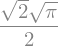

In [22]:
integrate(sin(x**2), (x, -oo, oo))

4. Find $\lim_{x\to 0}\frac{\sin{(x)}}{x}$

In [23]:
# Type Your Solution Here

In [24]:
limit(sin(x)/x, x, 0)

5. Solve $x^2 - 2 = 0$

In [25]:
# Type Your Solution Here

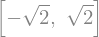

In [26]:
solve(x**2 - 2, x)

6. Solve the differential equation $y'' - y = e^t$

In [27]:
# Type Your Solution Here

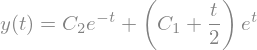

In [28]:
y = Function('y')
dsolve(Eq(y(t).diff(t, t) - y(t), exp(t)), y(t))

Print $\int_{0}^{\pi} \cos^{2}{\left (x \right )}\, dx$ in $\mathrm{\LaTeX}$

In [30]:
latex(Integral(cos(x)**2, (x, 0, pi)))

'\\int\\limits_{0}^{\\pi} \\cos^{2}{\\left(x \\right)}\\, dx'

## Series Expansion
SymPy can compute asymptotic series expansions of functions around a point. To
compute the expansion of $f(x)$ around the point $x = x_0$ terms of order
$x^n$ use `f(x).series(x,x0,n)`.`x0` and `n` can be omitted, in
which case the defaults `x0=0` and `n=6` will be used.

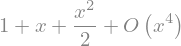

In [33]:
expr = exp(sin(x))
expr.series(x,0,4)

The $O\left(x^4\right)$ term at the end represents the Landau order term at
`x=0` (not to be confused with big O notation used in computer science, which
generally represents the Landau order term at $x=\infty$.  It means that all
x terms with power greater than or equal to $x^4$ are omitted.  Order terms
can be created and manipulated outside of `series`.  They automatically
absorb higher order terms.

## Lambdafy

Lambdafy allows you to use SymPy expressions as functions

The easiest way to convert a SymPy expression to an expression that can be numerically evaluated is to use the `lambdify` function. `lambdify` acts like a `lambda` function, except it converts the SymPy names to the names of the given numerical library, usually NumPy. For example

Recall `Lambda` functions are just small anonymous functions

In [34]:
import numpy as np
x = lambda a : a + 10
print(x(np.arange(10)))

[10 11 12 13 14 15 16 17 18 19]


In [35]:
x = lambda a, b : a * b
print(x(5,6))

30


In [36]:
def myfunc(n):
  return lambda a : a * n

mytripler = myfunc(3)

print(mytripler(11))

33


### Using Lambdafy with SymPy

In [41]:
x = symbols('x')
a = np.arange(10)
expr = sin(x)


f = lambdify(x, expr)

f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])